178.06427461086162
(400, 400)
True


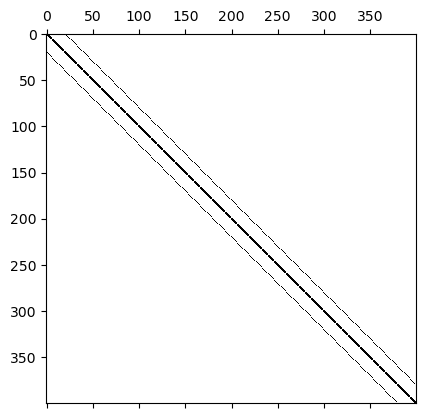

raggio spettrale Gauss-Seidel SOR  0.9316897358159151
372


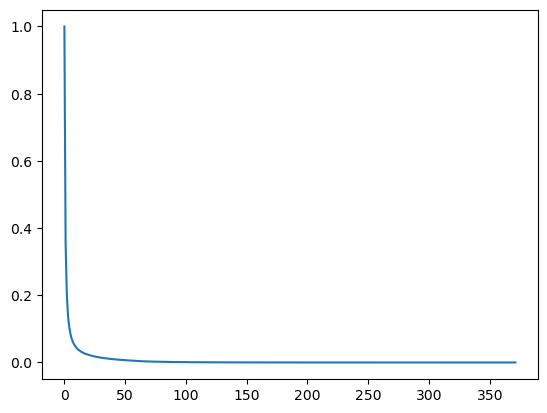

In [1]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import scipy as sp
import scipy.linalg as spl
import matplotlib.pyplot as plt
import RisolviSis

dati = loadmat('Test_I.mat')
A = dati["A"]
A = A.astype(float)
b = dati["b"]
b = b.astype(float)

print(npl.cond(A))
print(A.shape)
print(spl.issymmetric(A))
plt.spy(A)
plt.show()
#A e' sparsa, di grandi dimensioni, ben condizionata. Uso gauss-seidel-sor per risolvere il sistema.
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d = np.diag(A)
    D=np.diag(d)
    E= np.tril(A,-1)
    F= np.triu(A,1)
    #Calcolo della matrice di iterazione di Gassu_Seidel SOR
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.dot(npl.inv(Momega),Nomega)
    eigv = npl.eigvals(T)
    raggiospettrale= np.max(np.abs(eigv))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M= D+E
    N= -F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        tmp = b - np.dot(F,xold)
        xtilde,flag = RisolviSis.Lsolve(M,tmp) 
        xnew= (1-omega)*xold+omega*xtilde
        errore= npl.norm(xnew - xold)/npl.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet
 
x0 = np.zeros((A.shape[0],1))
toll = 10e-8
itmax = 1000
omega = 1.5
x,it,err = gauss_seidel_sor(A,b,x0,toll,itmax,omega)
plt.plot(np.arange(it),err)
print(it)

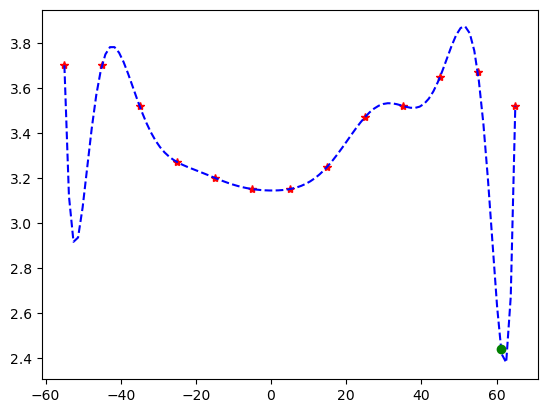

748849872.158655


NameError: name 'k' is not defined

In [2]:
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])

def plagr(xnodi,k):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if k==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:k],xnodi[k+1:n])
    
    num=np.poly(xzeri)
    den=np.polyval(num,xnodi[k])
    
    p= num/den
    
    return p

def InterpL(x, f, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for k in range(n):
        p= plagr(x,k)
        L[:,k]= np.polyval(p,xx)
    
     return np.dot(L,f)
xx = np.linspace(np.min(L),np.max(L),100)
pol = InterpL(L,T,xx)
lat = 61.2
pol_lat = InterpL(L,T,np.array([lat]))
plt.plot(L,T,'r*',xx,pol,'b--',lat,pol_lat,'og')
plt.show()

#Soluzione di un sistema sovradeterminato facendo uso della fattorizzazione QR    
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    #Calcola la fattorizzazione QR di A e utilizzala per calcolare
    #la soluzione nel senso dei minimi quadrati di Ax=b
    Q,R = spl.qr(A)
    h = Q.T@b
    x,flag = RisolviSis.Usolve(R[0:n,:],h[0:n])
    residuo = npl.norm(h[n:])**2
    return x, residuo
#Soluzione di un sistema sovradeterminato facendo uso della fattorizzazione SVD
def SVDLS(A,b):
     #Calcola la fattorizzazione SVD di A e utilizzala per calcolare
    #la soluzione nel senso dei minimi quadrati di Ax=b
    U,s,VT = spl.svd(A)
    V = VT.T
    
        
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    print("Rango: ",k)
    d=U.T@b
    d1=d[:k].reshape(k,1)
    s1=s[:k].reshape(k,1)
    #Risolve il sistema diagonale di dimensione kxk avene come matrice    dei coefficienti la matrice Sigma
    c=d1/s1 
    x=V[:,:k]@c 
    residuo=npl.norm(d[k:])**2
    return x,residuo

n = 5 #Grado del polinomio
n1 = n+1 #gradi di liberta'
A = np.vander(L,increasing=True)[:,:n1]
print(npl.cond(A))
print(np.max(A.shape) == k)

m = L.shape[0]
alpha, res = SVDLS(A,T)
alpha_qr, res_qr = qrLS(A,T)
xv = xx.copy()
pol = np.polyval(np.flip(alpha),xv)
pol_qr = np.polyval(np.flip(alpha_qr),xv)

plt.plot(xv,pol,'b-',L,T,'r*',xv,pol_qr,'y--')
plt.title("Approssimazione ai minimi quadrati con metodo SVDLS e qrLS")
plt.legend(["SVDLS","Punti di interpolazione","qrLS"])
plt.show()
